#### In this project, we are going to predict the insurance cost for individual based on the dataset we imported from Kaggle

In [157]:
import pandas as pd
import matplotlib.pyplot as plt

insurance_dataset = pd.read_csv("dataset.csv")
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#### Apply One-Hot Encoding on categorical data

In [35]:
# Apply the one-hot encoding using the get_dummies function from pandas framework
encoded_dataset = pd.get_dummies(insurance_dataset)
encoded_dataset

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


#### Prepare the dataset

In [39]:
X = encoded_dataset.loc[:, encoded_dataset.columns != 'charges']
y = encoded_dataset['charges']
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


#### Convert to Tensors

In [41]:
import tensorflow as tf

X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(1338, 11), dtype=float64, numpy=
 array([[19.  , 27.9 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
        [18.  , 33.77,  1.  , ...,  0.  ,  1.  ,  0.  ],
        [28.  , 33.  ,  3.  , ...,  0.  ,  1.  ,  0.  ],
        ...,
        [18.  , 36.85,  0.  , ...,  0.  ,  1.  ,  0.  ],
        [21.  , 25.8 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
        [61.  , 29.07,  0.  , ...,  1.  ,  0.  ,  0.  ]])>,
 <tf.Tensor: shape=(1338,), dtype=float64, numpy=
 array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
        29141.3603])>)

#### Split the dataset into Training and Testing datasets

In [57]:
split_portion = int(X.shape[0]*.8+1)
X_train, y_train, X_test, y_test = X[:split_portion], y[:split_portion], X[split_portion:], y[split_portion:]

#### Build the Neural Network

#### Model 1

In [118]:
from tensorflow.keras import activations, Sequential
from tensorflow.keras.layers import Dense

tf.random.set_seed(42)

model = Sequential([
    # Dense(100),
    Dense(10),
    # Dense(128, activation=activations.relu),
    # Dense(128, activation=activations.relu),
    Dense(1)
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 0s 755us/step - loss: 8568.7578 - mae: 8568.7578
Epoch 2/100
34/34 [==============================] - 0s 728us/step - loss: 7893.4844 - mae: 7893.4844
Epoch 3/100
34/34 [==============================] - 0s 786us/step - loss: 7430.5054 - mae: 7430.5054
Epoch 4/100
34/34 [==============================] - 0s 751us/step - loss: 7569.2207 - mae: 7569.2207
Epoch 5/100
34/34 [==============================] - 0s 743us/step - loss: 7589.5845 - mae: 7589.5845
Epoch 6/100
34/34 [==============================] - 0s 745us/step - loss: 7512.3838 - mae: 7512.3838
Epoch 7/100
34/34 [==============================] - 0s 776us/step - loss: 7714.6191 - mae: 7714.6191
Epoch 8/100
34/34 [==============================] - 0s 800us/step - loss: 7407.4976 - mae: 7407.4976
Epoch 9/100
34/34 [==============================] - 0s 775us/step - loss: 7617.5156 - mae: 7617.5156
Epoch 10/100
34/34 [==============================] - 0s 802us/step - loss: 7621.1

In [119]:
# Check the results of the insurance model on the test model data
import numpy as np

model.evaluate(X_test, y_test)
np.median(y_train), np.mean(y_train)

9/9 [==============================] - 0s 841us/step - loss: 9985.5605 - mae: 9985.5605


(9361.3268, 13239.016175928105)

#### Model 2

In [125]:
tf.random.set_seed(42)

model_2 = Sequential([
    Dense(100),
    Dense(10),
    Dense(1)
])

model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=["mae"]
)

model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 0s 827us/step - loss: 8105.2783 - mae: 8105.2783
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 6210.4565 - mae: 6210.4565
Epoch 3/100
34/34 [==============================] - 0s 914us/step - loss: 4782.0747 - mae: 4782.0747
Epoch 4/100
34/34 [==============================] - 0s 901us/step - loss: 4023.7605 - mae: 4023.7605
Epoch 5/100
34/34 [==============================] - 0s 922us/step - loss: 3820.3452 - mae: 3820.3452
Epoch 6/100
34/34 [==============================] - 0s 926us/step - loss: 3895.9905 - mae: 3895.9905
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 3851.8564 - mae: 3851.8564
Epoch 8/100
34/34 [==============================] - 0s 981us/step - loss: 3687.5020 - mae: 3687.5020
Epoch 9/100
34/34 [==============================] - 0s 906us/step - loss: 3937.7773 - mae: 3937.7773
Epoch 10/100
34/34 [==============================] - 0s 988us/step - loss: 3649.7075 

In [126]:
# Check the results of the insurance model on the test model data

model_2.evaluate(X_test, y_test)
np.median(y_train), np.mean(y_train)

9/9 [==============================] - 0s 860us/step - loss: 3748.7109 - mae: 3748.7109


(9361.3268, 13239.016175928105)

#### Model 3

In [144]:
tf.random.set_seed(42)

model_3 = Sequential([
    Dense(100),
    Dense(10),
    Dense(1)
])

model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=["mae"]
)

history_3 = model_3.fit(X_train, y_train, epochs=300, verbose=1)

Epoch 1/300
34/34 [==============================] - 0s 821us/step - loss: 8105.2783 - mae: 8105.2783
Epoch 2/300
34/34 [==============================] - 0s 895us/step - loss: 6210.4565 - mae: 6210.4565
Epoch 3/300
34/34 [==============================] - 0s 898us/step - loss: 4782.0747 - mae: 4782.0747
Epoch 4/300
34/34 [==============================] - 0s 876us/step - loss: 4023.7605 - mae: 4023.7605
Epoch 5/300
34/34 [==============================] - 0s 871us/step - loss: 3820.3452 - mae: 3820.3452
Epoch 6/300
34/34 [==============================] - 0s 862us/step - loss: 3895.9905 - mae: 3895.9905
Epoch 7/300
34/34 [==============================] - 0s 913us/step - loss: 3851.8564 - mae: 3851.8564
Epoch 8/300
34/34 [==============================] - 0s 871us/step - loss: 3687.5020 - mae: 3687.5020
Epoch 9/300
34/34 [==============================] - 0s 872us/step - loss: 3937.7773 - mae: 3937.7773
Epoch 10/300
34/34 [==============================] - 0s 940us/step - loss: 3649.7

In [145]:
# Check the results of the insurance model on the test model data

model.evaluate(X_test, y_test)
np.median(y_train), np.mean(y_train)

9/9 [==============================] - 0s 942us/step - loss: 3552.6113 - mae: 3552.6113


(9361.3268, 13239.016175928105)

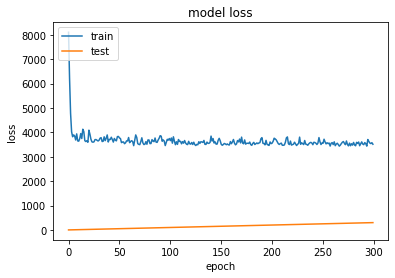

In [156]:

plt.plot(history_3.history['loss'])
plt.plot(history_3.epoch)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### It is time to scale data using one of the Feature Scaling algorithms (e.g., Normalization)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

insurance_dataset = pd.read_csv("dataset.csv")

In [173]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

X = insurance_dataset.drop("charges", axis=1)
y = insurance_dataset["charges"]

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)

X_test_normal = ct.transform(X_test)

In [179]:
# Notice that the normalized X_train data have been converted to numeric values
X_train, X_train_normal

(      age     sex     bmi  children smoker     region
 560    46  female  19.950         2     no  northwest
 1285   47  female  24.320         0     no  northeast
 1142   52  female  24.860         0     no  southeast
 969    39  female  34.320         5     no  southeast
 486    54  female  21.470         3     no  northwest
 ...   ...     ...     ...       ...    ...        ...
 1095   18  female  31.350         4     no  northeast
 1130   39  female  23.870         5     no  southeast
 1294   58    male  25.175         0     no  northeast
 860    37  female  47.600         2    yes  southwest
 1126   55    male  29.900         0     no  southwest
 
 [1070 rows x 6 columns],
 array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
         0.        ],
        [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
         0.        ],
        ...,
        [0.

#### Now, build another model and apply it on the normalized dataset

In [182]:
tf.random.set_seed(42)

# 1. Build the model
model_2_1 = Sequential([
    Dense(100),
    Dense(10),
    Dense(1)
])

# 2. Compile the model with hyperparameters: Loss Function, Optimizer and the Evaluation Metric
model_2_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=["mae"]
)

# 3. Fit the model and store it to the variable history for later plotting the loss vs epochs 
history_2_1 = model_2_1.fit(X_train_normal, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 0s 911us/step - loss: 9233.7949 - mae: 9233.7949
Epoch 2/100
34/34 [==============================] - 0s 941us/step - loss: 4625.0562 - mae: 4625.0562
Epoch 3/100
34/34 [==============================] - 0s 931us/step - loss: 3805.1731 - mae: 3805.1731
Epoch 4/100
34/34 [==============================] - 0s 914us/step - loss: 3661.0776 - mae: 3661.0776
Epoch 5/100
34/34 [==============================] - 0s 944us/step - loss: 3663.1360 - mae: 3663.1360
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 3695.3171 - mae: 3695.3171
Epoch 7/100
34/34 [==============================] - 0s 958us/step - loss: 3754.9006 - mae: 3754.9006
Epoch 8/100
34/34 [==============================] - 0s 946us/step - loss: 3820.7456 - mae: 3820.7456
Epoch 9/100
34/34 [==============================] - 0s 973us/step - loss: 3625.3381 - mae: 3625.3381
Epoch 10/100
34/34 [==============================] - 0s 930us/step - loss: 3712.535

#### Evaluate the model

In [184]:
model_2_1.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 847us/step - loss: 3237.9329 - mae: 3237.9329


[3237.932861328125, 3237.932861328125]

#### Plot the Loss function vs Epochs for the last improved model applied on the normalized independent variables dataset with OneHot Encoded categorical data

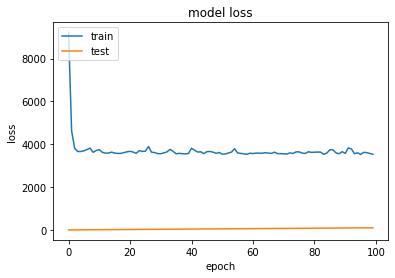

In [185]:
plt.plot(history_2_1.history['loss'])
plt.plot(history_2_1.epoch)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()